# Banking Marketing Campaign Prediction
### Umar Faruk Abdullahi (contactumarfaruk@gmail.com)

### Project Description:
In this project, we train machine learning models to to predict whether a
client would respond positively or negatively to the campaign. The data was collected from direct marketing campaigns of a banking institution. The
marketing campaigns were based on phone calls.

The project is separated into four steps:


*   Data Processing and EDA
*   Feature Selection and Engineering
*   Model Training and Evaluation
*   Model Comparison




## Imports

We load all the relevant data science and machine learning libraries required for the execution of the project.

Also, we import utility libraries to aid in our data fetching.

Data is loaded from a remote location if not present in the current runtime.

In [ ]:
import os
import requests

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency

from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict, GridSearchCV, train_test_split, learning_curve
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, average_precision_score, roc_curve, auc, mean_squared_error
from sklearn.preprocessing import StandardScaler, label_binarize, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.utils import class_weight
from sklearn.compose import ColumnTransformer

from imblearn.over_sampling import BorderlineSMOTE

import xgboost as xgb

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout



In [ ]:
filename = 'MP1_Bank.csv'

if not os.path.exists(filename):
  print("Data not present locally... Fetching....")

  with open(filename,'w', encoding="utf-8") as f:
    url = f"https://raw.githubusercontent.com/farouqu/ds_proj_1/main/{filename}"
    data = requests.get(url).text
    f.write(data)
    print("Data loaded.")

data = pd.read_csv(filename, delimiter=";")

## 1. Data Processing and EDA

In this section, the data is analyzed for discrepancies including but not limited to missing values, null values etc. A statistical summary of the data is also provided to aid in quick understanding of the nuances and distribution of the data.

In [ ]:
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# Get summary of the data
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

The features above can be categorised into four:


1. Bank client data: age, job, marital, eduction etc
2. Last contact with customer in current campaign: contact, day_of_week, month etc
3. Other attributes: campaign, pdays, previous, poutcome etc
4. Social and economic context values: emp.var.rate, cons.price.idx, cons.conf.idx, etc

And the target variable: **y = has the client subscribed to a term deposit?**



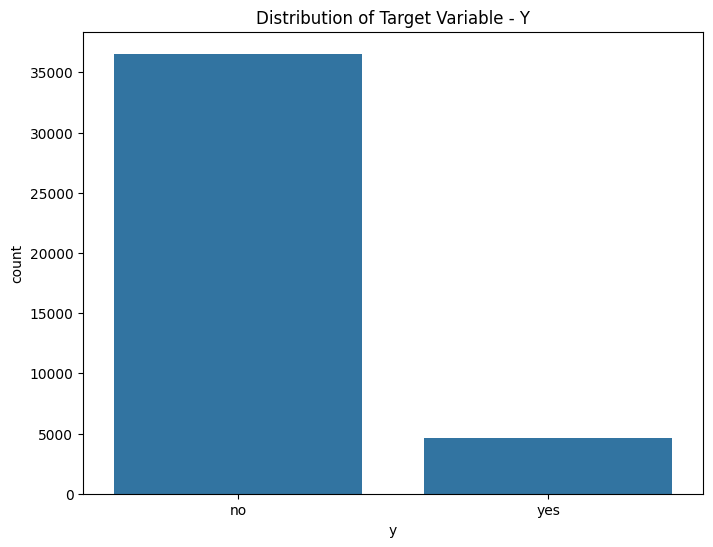

In [ ]:
# Visualize distribution of the target variable - Grade
plt.figure(figsize=(8, 6))
sns.countplot(x='y', data=data)
plt.title('Distribution of Target Variable - Y')
plt.show()

Based on the presented data, it's evident that despite the bank's proactive approach in direct marketing through phone calls to consumers, the conversion rate stands at approximately 12%. While this indicates some success, there's room for enhancement.

According to the [Martech Report](https://martech.org/report-calls-have-30-to-50-percent-conversion-rates-most-come-from-mobile/), phone calls typically yield conversion rates ranging from 30% to 50% in marketing initiatives. This stark contrast suggests an opportunity for optimization. Leveraging machine learning algorithms to predict the likelihood of a successful call could empower the marketing team to focus their efforts more effectively.

By harnessing predictive analytics, the bank can strategically allocate resources towards endeavors with higher potential for success, thereby maximizing their marketing ROI and fostering greater customer engagement.

We now check the distribution of some key features before proceeding to feature selection.

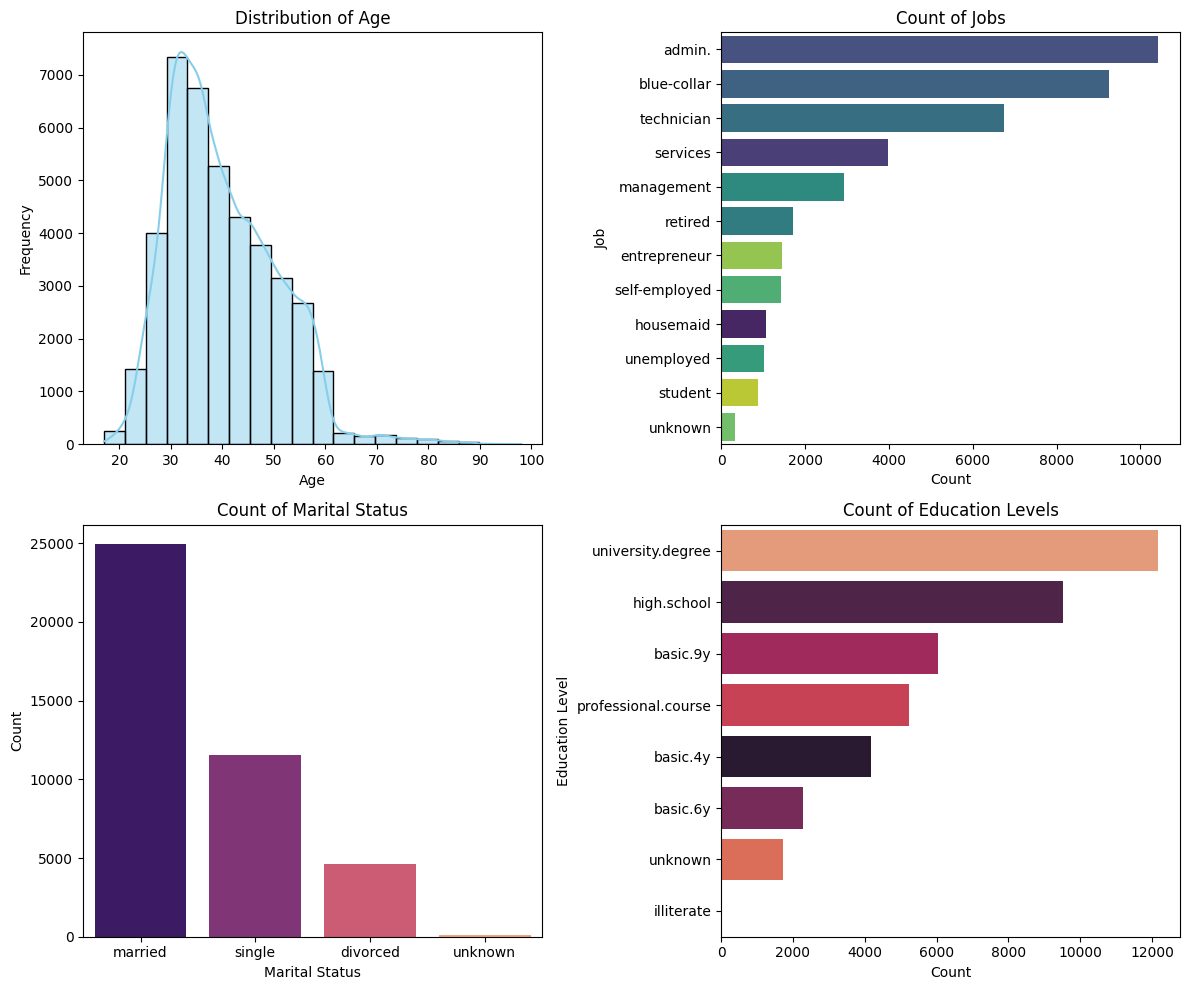

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(data['age'], bins=20, kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

sns.countplot(data=data, y='job', order=data['job'].value_counts().index, palette='viridis', hue='job', ax=axes[0, 1])
axes[0, 1].set_title('Count of Jobs')
axes[0, 1].set_xlabel('Count')
axes[0, 1].set_ylabel('Job')

sns.countplot(data=data, x='marital', order=data['marital'].value_counts().index, palette='magma', hue='marital', ax=axes[1, 0])
axes[1, 0].set_title('Count of Marital Status')
axes[1, 0].set_xlabel('Marital Status')
axes[1, 0].set_ylabel('Count')

sns.countplot(data=data, y='education', order=data['education'].value_counts().index, palette='rocket', hue='education', ax=axes[1, 1])
axes[1, 1].set_title('Count of Education Levels')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('Education Level')

plt.tight_layout()

plt.show()

The graphs reveal key patterns about the bank's customer base. When we consider all the graphs together:

* Most customers fall into the middle-aged category.
* Most are married.
* A significant portion works in the industry sector.
* They tend to have higher education levels.

In summary, the bank's typical customer is likely to be a middle-aged, married individual with a higher level of education, often employed in the industry sector. Understanding these demographics can help the bank tailor its services to better meet the needs of its core customer base.

We'll also consider the correlation between the type of contact made i.e cellular or tellphone, and how it might impact the user's decision. We employ the chi-square test of independence evaluates whether there is a significant association between 'contact' and 'y'. If the value is greater than our p-value of 0.05, we accept the null hypothesis that there is no correlation between the contact type and campaign result.

In [ ]:
contingency_table = pd.crosstab(data['contact'], data['y'])

# Perform chi-square test of independence
chi2, p, _, _ = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p)

Chi-square statistic: 862.3183642075705
P-value: 1.5259856523129964e-189


Based on this result, we might conclude that there is no correlation between the contact type and campaign outcome.

We'll also check if the duration of the call provides an insight into the result of the campaign.

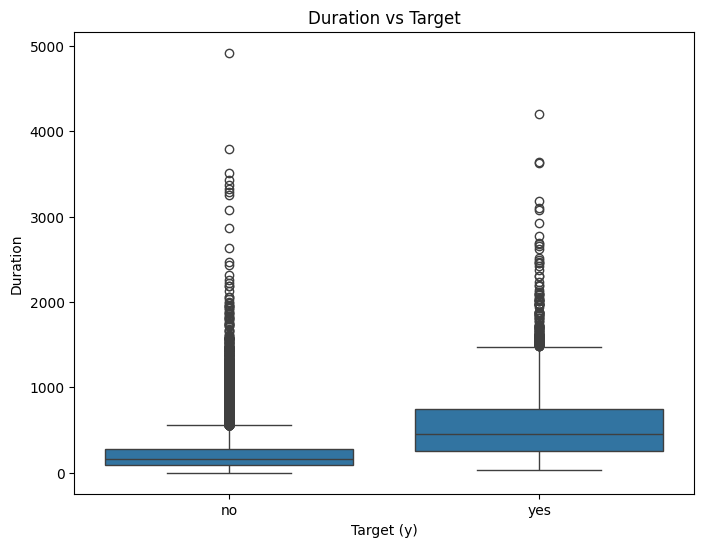

In [ ]:
plt.figure(figsize=(8, 6))

sns.boxplot(x='y', y='duration', data=data)

plt.xlabel('Target (y)')
plt.ylabel('Duration')
plt.title('Duration vs Target')

plt.show()

We noticed that longer calls tend to result in more positive responses from customers. However, there are some exceptional cases in both groups, so we can't say for sure if this applies to everyone.

In essence, while longer calls might generally lead to better outcomes, it's not always the case. We need to look closer at the data to understand why this happens and consider other factors too.



## 2. Feature Selection and Engineering

In this section, we carefully choose features that are most relevant for our modeling task. Additionally, we refine selected categorical features through feature engineering, ensuring they are in a format compatible with training machine learning models.

By selecting the most meaningful features and optimizing their format, we aim to enhance the performance and accuracy of our machine learning models.

### Selection

In [ ]:
data = data.drop('duration',axis=1)

In [ ]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


We have decided to remove the **duration** feature from our dataset based on the recommendation. This choice is because the duration of a call becomes known only after the call has ended. Since our goal is to build a predictive model, including this feature would distort our model and hinder its predictive accuracy, as the duration is not available beforehand.

### Processing

We start by encoding the categorical features in our dataset to numerical format for model training. Encoding is a necessary step in machine learning when working with categorical data.

Data encoding refers to the process of converting data from one format or representation to another. In our case, we convert the **string** categorical features to **numeric features** for training with our model.

In our dataset, we'll perform two types of feature encoding:

1.   One-hot encoding: In one-hot encoding, each category or level of a categorical variable is represented by a binary vector. This vector has the length equal to the number of categories, and each position in the vector corresponds to a specific category. The value 1 is assigned to the position corresponding to the category of the observation, while all other positions are filled with zeros. We apply one-hot encoding to features that have no ordinal manner i.e **job, marital, education, default, housing, loan, contact and poutcome**


2.   Ordinal encoding: In ordinal encoding, the features within a categorical variable are mapped to integer values based on their order or predefined ranking. This method replaces the categorical labels with numerical codes, allowing algorithms to interpret the data in a format more conducive to analysis and modeling. We apply ordinal encoding to features that posses a predefined order i.e **month, day_of_week**

3. Manual encoding: In this case, we convert the categorical values in the column to appropriate numerical equivalents. This is applied on:

*   **pdays**: 999 ==> -1, other values as is
*   **y**: yes ===> 1, no ===> 0

All other numerical values in dataset are left AS IS.



In [ ]:
# Perform one-hot encoding
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

data_encoded = pd.get_dummies(data, columns=categorical_features)

In [ ]:
# Perform ordinal encoding on months (1 to 12)
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
label_encoder = LabelEncoder()
label_encoder.fit(month_order)

data_encoded['month'] = label_encoder.fit_transform(data['month'])

In [ ]:
# Perform ordinal encoding on months (1 to 5)
day_order = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
label_encoder = LabelEncoder()
label_encoder.fit(day_order)

data_encoded['day_of_week'] = label_encoder.fit_transform(data['day_of_week'])
data_encoded['day_of_week'] = data['day_of_week'].map({day: index + 1 for index, day in enumerate(day_order)})

In [ ]:
# Encoding for 'pdays' and replacing '999' with a meaningful value
data_encoded['pdays'] = data['pdays'].replace(999, -1)

In [ ]:
# Convert 'y' variable to numerical format
data_encoded['y'] = data_encoded['y'].map({'yes': 1, 'no': 0})

In [ ]:
# Check the counts of 'yes' and 'no' in the target variable
target_counts = data_encoded['y'].value_counts()

# Print the counts
print("Counts of 'yes' and 'no' in the target variable:")
print(target_counts)

Counts of 'yes' and 'no' in the target variable:
0    36548
1     4640
Name: y, dtype: int64


## 3. Model Training and Evaluation

In this section, we train different machine learning models on the dataset. This allows us to view the models' performance and compare the performance of the models on the same data. We start by using a DecisionTree classifer as a baseline. Decision tree classifiers are advantageous due to their simplicity, interpretability, ability to handle both numerical and categorical data, and capability to capture non-linear relationships and interactions within the data. We then train the following models and compare their performance on the data:


1.   RandomForest: RandomForest is well-suited for our type of problem because it is an ensemble learning method that combines multiple decision trees, allowing it to capture complex relationships and patterns in the data while mitigating overfitting and handling imbalanced classes effectively.
2.   XGBoost: XGBoost is well-suited for this classification problem due to its ability to handle imbalanced datasets, capture complex nonlinear relationships, and optimize performance through gradient boosting, potentially outperforming RandomForest by iteratively improving weak learners' predictions with an emphasis on misclassified instances.



In [ ]:
X = data_encoded.drop('y', axis=1)
y = data_encoded['y']

In [ ]:
# Use SelectKBest to select the top k features based on ANOVA F-statistics
k_best = SelectKBest(score_func=f_classif, k='all')
fit = k_best.fit(X, y)

# Get feature scores and names
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': fit.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

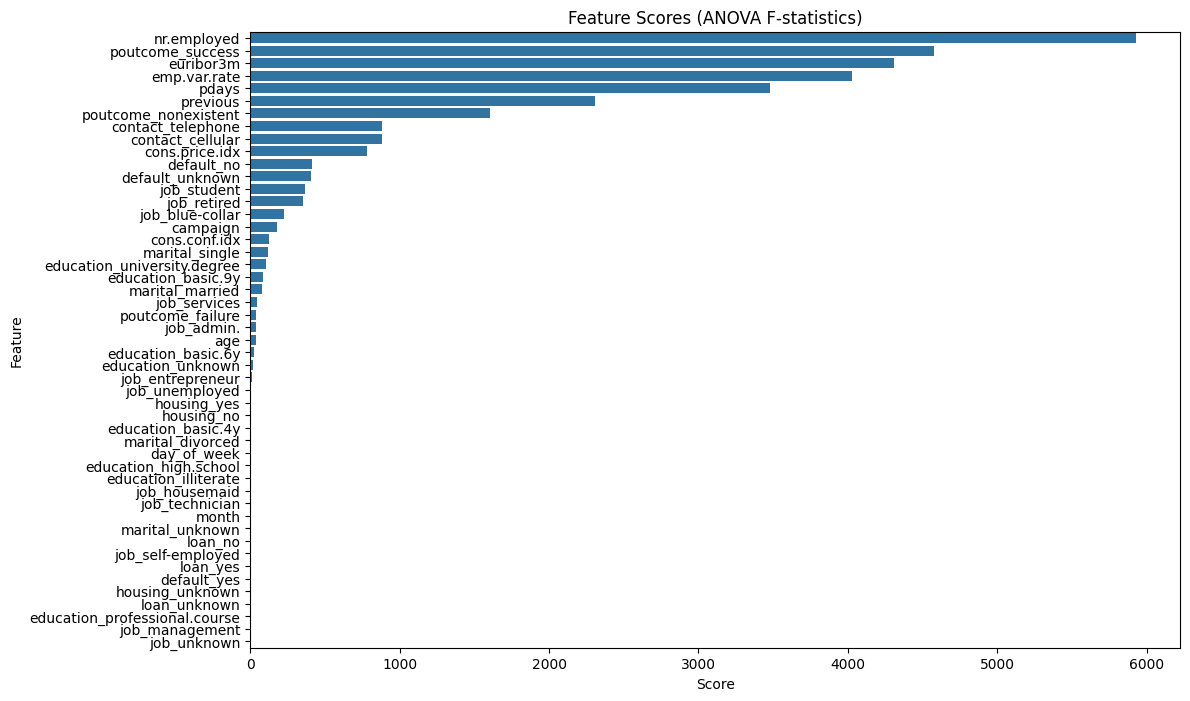

In [ ]:
# Visualize feature scores
plt.figure(figsize=(12, 8))
sns.barplot(x='Score', y='Feature', data=feature_scores)
plt.title('Feature Scores (ANOVA F-statistics)')
plt.show()

Next, we partition the data into training and testing sets, a fundamental step in model development. Additionally, we incorporate scaling on the dataset to maintain uniform value representation across different model architectures, promoting robust training performance.

Scaling is applied to data before training on machine learning models to prevent feature dominance, improve convergence, enhance model performance, ensure model robustness, and facilitate interpretability.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
def plot_cm(cm, name):
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
  plt.title(f'Confusion Matrix - {name}')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

In [ ]:
def plot_roc_curve(y_true, y_pred_prob, name):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)

    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Plot the diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {name}')
    plt.legend(loc='lower right')
    plt.show()

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, dt_pred)

print("Accuracy:", accuracy)
print("Random Forest Accuracy:", accuracy_score(y_test, dt_pred))
print("Random Forest Mean Squared Error (MSE):", mean_squared_error(y_test, dt_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, dt_pred))


Accuracy: 0.8404952658412236
Random Forest Accuracy: 0.8404952658412236
Random Forest Mean Squared Error (MSE): 0.1595047341587764
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      7303
           1       0.30      0.30      0.30       935

    accuracy                           0.84      8238
   macro avg       0.61      0.61      0.61      8238
weighted avg       0.84      0.84      0.84      8238



Although the model achieves an accuracy rate exceeding 80%, its precision and recall metrics for the **yes** class are notably deficient. To gain deeper insights into this discrepancy, we present the data distribution and implement targeted strategies to rectify the issue.


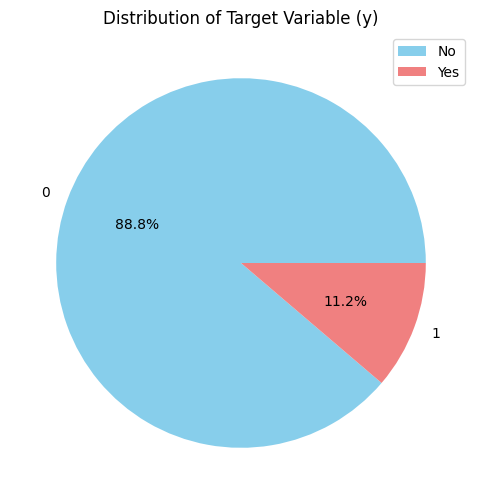

In [ ]:
plt.figure(figsize=(6, 6))
y_train.value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Target Variable (y)')
plt.ylabel('')
plt.legend(labels=['No', 'Yes'], loc='upper right')
plt.show()

The disproportionate frequency of the **no** response compared to **yes** results in a class imbalance, potentially skewing the model's performance towards the majority class. To mitigate this imbalance, several techniques can be employed, including:

1. Resampling the dataset by either undersampling the majority class or oversampling the minority class.
2. Implementing methods such as Synthetic Minority Over-sampling Technique (SMOTE) to create synthetic samples for the minority class.
3. Utilizing ensemble methods like bagging or boosting, which combine models trained on balanced subsets of data.

To tackle this issue, we will employ the BorderlineSMOTE technique on our dataset.

BorderlineSMOTE is an oversampling technique designed to address class imbalance by generating synthetic samples near the decision boundary between minority and majority classes. It identifies "borderline" minority class instances, which are close to the decision boundary, and generates synthetic samples based on these instances. This helps improve the classifier's ability to learn the decision boundary and make accurate predictions for minority class instances, especially in complex and nonlinear scenarios.

Subsequently, we will train the model using ensemble learning algorithms as specified above.

In [ ]:
borderline_smote = BorderlineSMOTE(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = borderline_smote.fit_resample(X_train, y_train)

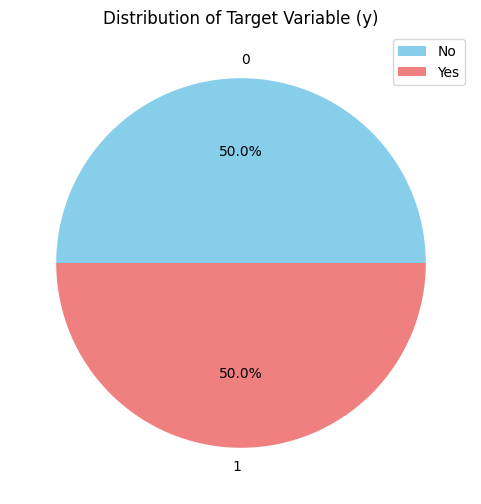

In [ ]:
plt.figure(figsize=(6, 6))
y_resampled.value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Target Variable (y)')
plt.ylabel('')
plt.legend(labels=['No', 'Yes'], loc='upper right')
plt.show()

### Random Forest

Random Forest Accuracy: 0.8725418790968682
Random Forest Mean Squared Error (MSE): 0.12745812090313183
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      7303
           1       0.45      0.50      0.47       935

    accuracy                           0.87      8238
   macro avg       0.69      0.71      0.70      8238
weighted avg       0.88      0.87      0.88      8238



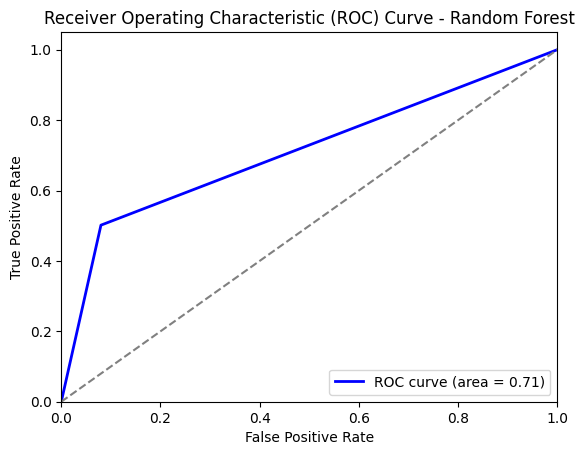

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=12, max_features='sqrt', bootstrap=True,
                                        class_weight='balanced', criterion='gini', random_state=42)
rf_model.fit(X_resampled, y_resampled)
rf_predictions = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, rf_predictions)

print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Mean Squared Error (MSE):", mean_squared_error(y_test, rf_predictions))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))

rf_model_cm = confusion_matrix(y_test, rf_predictions)
plot_roc_curve(y_test, rf_predictions, "Random Forest")

We leverage cross-validation with a StratifiedKFold approach on the RandomForest classifier to enhance the robustness of our results through iterative training on the data.

In [ ]:
def apply_stratified_kfold(X, y, model):
    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    train_indices_list = []
    test_indices_list = []

    confusion_matrices = []

    for train_index, test_index in stratified_kfold.split(X, y):
        train_indices_list.append(train_index)
        test_indices_list.append(test_index)

    for fold, (train_index, test_index) in enumerate(zip(train_indices_list, test_indices_list)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        print(f"Fold {fold + 1} {type(model).__name__} Accuracy:", accuracy_score(y_test, y_pred))
        print(f"Fold {fold + 1} {type(model).__name__} Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
        print(f"Fold {fold + 1} {type(model).__name__} Classification Report:\n", classification_report(y_test, y_pred))

        cm = confusion_matrix(y_test, y_pred)
        confusion_matrices.append(cm)

        print(f"Fold {fold + 1} {type(model).__name__} Confusion Matrix:\n", cm)

    cv_scores = cross_val_score(model, X, y, cv=stratified_kfold, scoring='accuracy')

    mean_acc = np.mean(cv_scores)

    print("Cross-validation scores:", cv_scores)
    print("Mean accuracy:", mean_acc)

    return confusion_matrices, cv_scores, mean_acc

In [ ]:
cm_matrices_rf, cv_scores_rf, mean_acc_rf = apply_stratified_kfold(X, y, rf_model)

Fold 1 RandomForestClassifier Accuracy: 0.8619810633648944
Fold 1 RandomForestClassifier Mean Squared Error (MSE): 0.13801893663510562
Fold 1 RandomForestClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92      7310
           1       0.42      0.56      0.48       928

    accuracy                           0.86      8238
   macro avg       0.68      0.73      0.70      8238
weighted avg       0.88      0.86      0.87      8238

Fold 1 RandomForestClassifier Confusion Matrix:
 [[6582  728]
 [ 409  519]]
Fold 2 RandomForestClassifier Accuracy: 0.863923282350085
Fold 2 RandomForestClassifier Mean Squared Error (MSE): 0.13607671764991502
Fold 2 RandomForestClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92      7310
           1       0.42      0.56      0.48       928

    accuracy                           0.86      8238
  

### XGBoost Classifier

XGBoost Classifier Accuracy: 0.8860160233066279
Linear Mean Squared Error (MSE): 0.11398397669337218
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      7303
           1       0.50      0.40      0.44       935

    accuracy                           0.89      8238
   macro avg       0.71      0.67      0.69      8238
weighted avg       0.88      0.89      0.88      8238



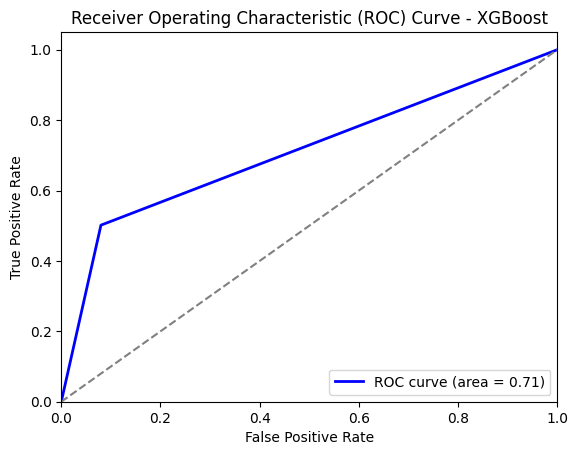

In [ ]:
# Initialize XGBoost classifier
xgb_clf = xgb.XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1,
                            objective='binary:logistic', eval_metric='error',
                            random_state=42)

xgb_clf.fit(X_resampled, y_resampled)

y_pred_xgb = xgb_clf.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Classifier Accuracy: {accuracy_xgb}")
print("Linear Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
plot_roc_curve(y_test, rf_predictions, "XGBoost")

In [ ]:
cm_matrices_xgb, cv_scores_xgb, mean_acc_xgb = apply_stratified_kfold(X, y, xgb_clf)

Fold 1 XGBClassifier Accuracy: 0.898154891964069
Fold 1 XGBClassifier Mean Squared Error (MSE): 0.10184510803593105
Fold 1 XGBClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7310
           1       0.62      0.24      0.35       928

    accuracy                           0.90      8238
   macro avg       0.77      0.61      0.65      8238
weighted avg       0.88      0.90      0.88      8238

Fold 1 XGBClassifier Confusion Matrix:
 [[7173  137]
 [ 702  226]]
Fold 2 XGBClassifier Accuracy: 0.9009468317552805
Fold 2 XGBClassifier Mean Squared Error (MSE): 0.09905316824471959
Fold 2 XGBClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      7310
           1       0.65      0.27      0.38       928

    accuracy                           0.90      8238
   macro avg       0.78      0.62      0.66      8238
weighted av

## 4. Model Comparison

After training the RandomForest and XGBoost classifiers, the XGBoost classifier showed slightly higher accuracy, achieving 89%, compared to the RandomForest classifier's 87%. However, both models demonstrated a similar Area under the ROC curve of 0.71.

Upon applying cross-validation to assess their robustness, the XGBoost model maintained its lead with an average accuracy of 90%, whereas the RandomForest model lagged slightly behind with an average accuracy of 86%. However, a closer inspection revealed that while XGBoost boasted of superior accuracy, it exhibited lower recall than the RandomForest model. This suggests that the RandomForest model, despite its slightly lower accuracy, possessed a superior ability to correctly identify positive instances.

The accuracy plots of both models are displayed below:

In [ ]:
def plot_accuracy(accuracies_before_cv, accuracies_after_cv, model_names=['Model 1', 'Model 2']):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].bar(np.arange(2), accuracies_before_cv, color=['blue', 'orange'])
    axs[0].set_title('Before Cross-Validation')
    axs[0].set_xticks(np.arange(2))
    axs[0].set_xticklabels(model_names)
    axs[0].set_ylim([0, 100])
    axs[0].set_ylabel('Accuracy (%)')

    axs[1].bar(np.arange(2), accuracies_after_cv, color=['blue', 'orange'])
    axs[1].set_title('After Cross-Validation')
    axs[1].set_xticks(np.arange(2))
    axs[1].set_xticklabels(model_names)
    axs[1].set_ylim([0, 100])
    axs[1].set_ylabel('Accuracy (%)')

    plt.tight_layout()

    plt.show()

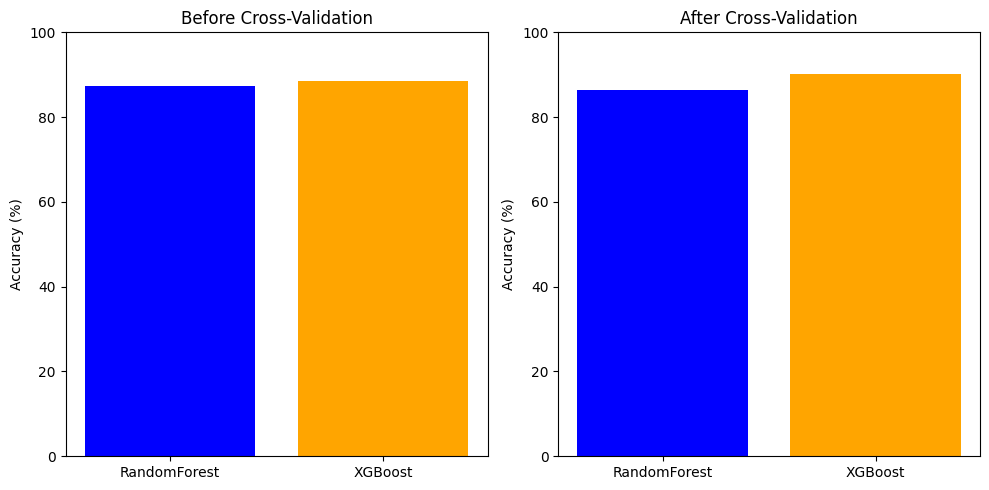

In [ ]:
rf_before = (accuracy_rf * 100)
rf_after = (mean_acc_rf * 100)

xgb_before = (accuracy_xgb * 100)
xgb_after = (mean_acc_xgb * 100)

plot_accuracy([rf_before, xgb_before],
                                  [rf_after, xgb_after],
                                  model_names=['RandomForest', 'XGBoost'])